# The Basic Laplace Mechanism

## The Laplace Distribution

First, let's look at the Laplace Distribution:

$f\left(x\middle|\mu,b\right)=\frac{1}{2b}e^{\left(-\frac{\left|x-\mu\right|}{b}\right)}$

For implementing simple $\epsilon$-differential privacy, we'll set the location to zero: $\mu=0$. That gives us:

$f\left(x\middle|\mu,b\right)=\frac{1}{2b}e^{\left(-\frac{\left|x\right|}{b}\right)}$

Next we'll have a quick look at what the Laplace distribution looks like using some Python...

In [1]:
# Some initial Python setup requirements for later code.

# Required to get the plots inline for Census implementation.
%matplotlib inline

# Load the libraries we need.
import matplotlib.pyplot as plt
import numpy as np

# Set the threshold for numpy output values that get printed to the screen.
np.set_printoptions(threshold=10)


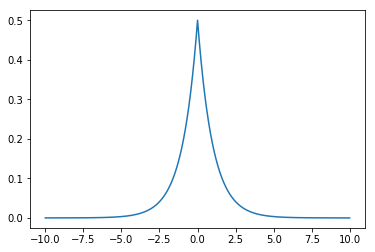

In [2]:
# Set the scale:
b = 1.

# Adjust the plot to the scale we chose:
plotrange=10.*b
plotscale=b/100.

# Now plot the Laplace distribution:
x = np.arange(-plotrange, plotrange, plotscale)
pdf = np.exp(-abs(x)/b)/(2.*b)
plt.plot(x, pdf)

## Sample from the Laplace Distribution
Conveniently, Python (the NumPy package, really) has a way to sample from this distribution. 

*Note: If you are using tools that don't have this facility (Excel!), you can construct a sample from the Laplace distribution by taking the difference between two independent samples of the exponential distribution.)*

Below we'll draw some samples and list and plot them:

[ 0.25029191 -0.08511179 -0.39802793 ..., -2.53619969  1.93589419
 -0.68472818]


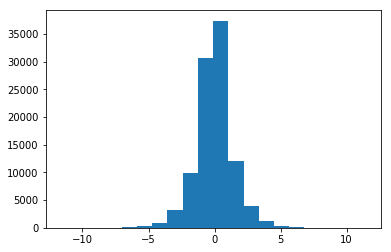

In [3]:
# Set the scale:
b = 1.

# Generate the samples 
numsamples = 100000
samples = np.random.laplace(0,b,numsamples)

# First, print the samples:
print(samples)

# Then display an histogram of the noise:
numbins=20
histnoise=plt.hist(samples,numbins)